<a href="https://colab.research.google.com/github/arka57/CNN/blob/main/Cardio_Vascular_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
cd MyDrive/AlmaBetter/Project/Cardiovascular_disease_prediction

/gdrive/MyDrive/AlmaBetter/Project/Cardiovascular_disease_prediction


In [ ]:
ls

 data_cardiovascular_risk.csv  'PS- Cardiovascular Risk Prediction.pdf'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer
from scipy.stats import f_oneway
from scipy.stats import chi2, chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#importing dataset
data=pd.read_csv("data_cardiovascular_risk.csv")

In [ ]:
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
#Checking for null values 

In [ ]:
data.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
(data.isnull().sum()/len(data))*100

id                 0.000000
age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

In [ ]:
#columns with null values--education,cigperday,bpmeds,totchol,bmi,heartrate,glucose

In [ ]:
#All columns have very less % of values as null. So they will be replaced with some values

In [ ]:
data['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


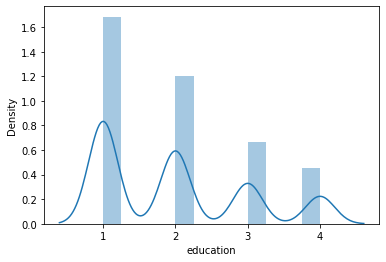

In [ ]:
sns.distplot(data['education'])

In [ ]:
#Education --can be treated as categorical variable only as it has only 4 possible values

In [ ]:
data1=data.groupby(['education','TenYearCHD'])['education'].value_counts()

In [ ]:
data['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [ ]:
#Target variable is data is imbalanced. 
#It can be treated in various ways. here first accuracy metric will be changed and Decision Tree will be used

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


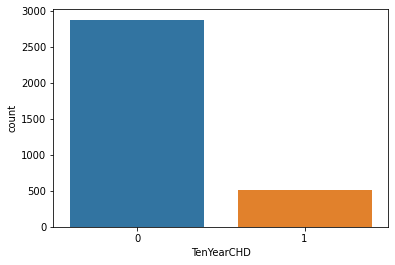

In [ ]:
sns.countplot(data['TenYearCHD'])

In [ ]:
#Independent Variables:
    #Numerical Variables

In [ ]:
#Numerical Values:
 0   id                int64  
 1   age               int64  
 2   education         float64 
 5   cigsPerDay        float64
 6   BPMeds            float64
 7   prevalentStroke   int64  
 8   prevalentHyp      int64  
 9   diabetes         int64  
 10  totChol          float64
 11  sysBP            float64
 12  diaBP            float64
 13  BMI              float64
 14  heartRate        float64
 15  glucose          float64
 16  TenYearCHD       int64

IndentationError: ignored

In [ ]:
#id-Useless we will remove it

In [ ]:
data.drop('id',axis=1,inplace=True)

In [ ]:
data.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
#Handling the null values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


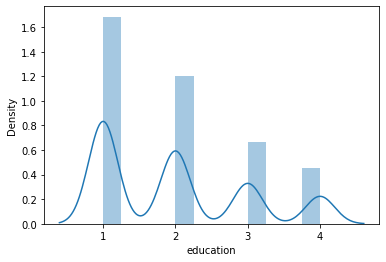

In [ ]:
#Education

sns.distplot(data['education'])

In [ ]:
data['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


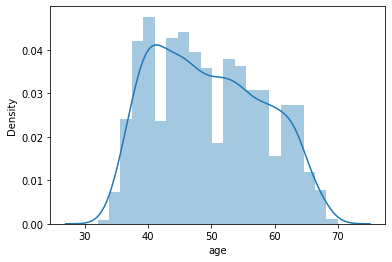

In [ ]:
sns.distplot(data['age'])

In [ ]:
x=['age',               
 'education',         
  'cigsPerDay',       
   'BPMeds',       
  'prevalentStroke',    
  'prevalentHyp',       
   'diabetes',           
  'totChol',          
  'sysBP',            
  'diaBP',            
  'BMI',              
  'heartRate',       
  'glucose',         
  'TenYearCHD']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


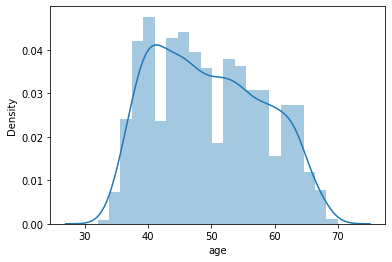

In [ ]:
sns.distplot(data['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


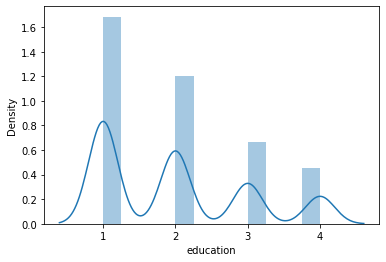

In [ ]:
sns.distplot(data['education'])#categorical

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


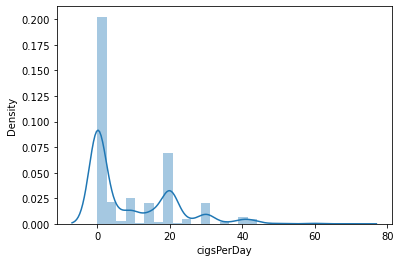

In [ ]:
sns.distplot(data['cigsPerDay'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


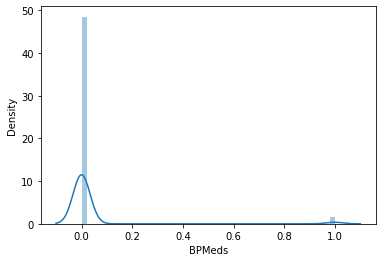

In [ ]:
sns.distplot(data['BPMeds'])#Categorical

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


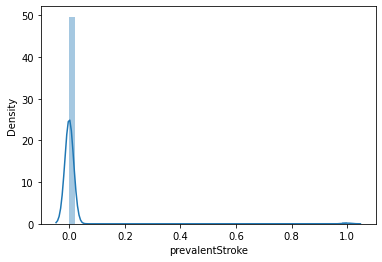

In [ ]:
sns.distplot(data['prevalentStroke'])#categorical

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


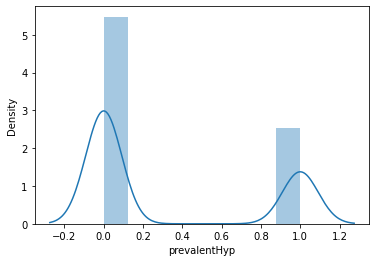

In [ ]:
sns.distplot(data['prevalentHyp'])#categorical

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


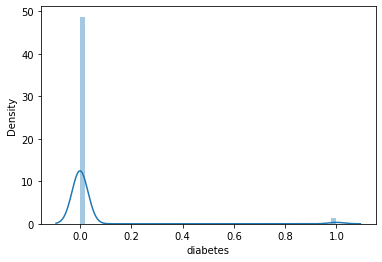

In [ ]:
sns.distplot(data['diabetes'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


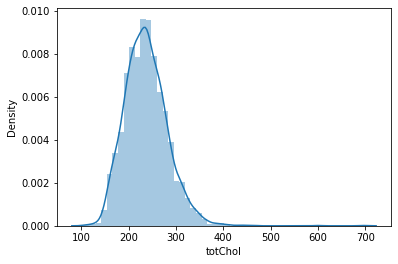

In [ ]:
sns.distplot(data['totChol'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


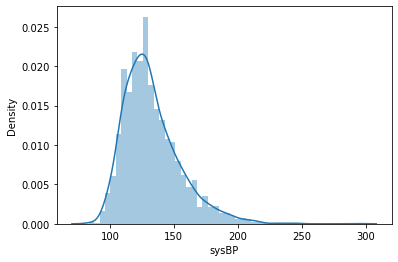

In [ ]:
sns.distplot(data['sysBP'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


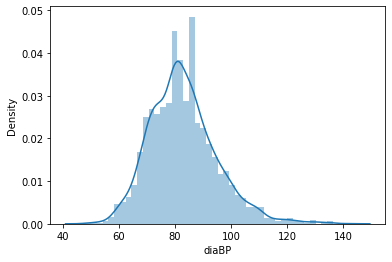

In [ ]:
sns.distplot(data['diaBP'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


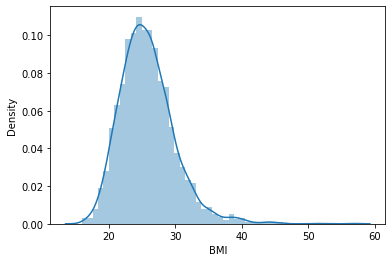

In [ ]:
sns.distplot(data['BMI'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


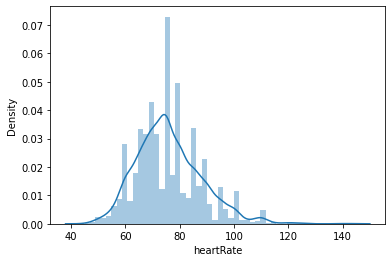

In [ ]:
sns.distplot(data['heartRate'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


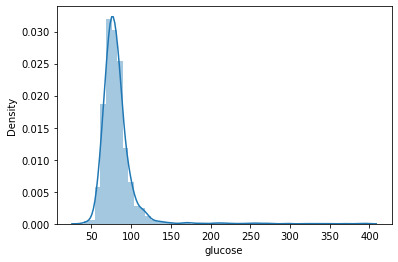

In [ ]:
sns.distplot(data['glucose'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


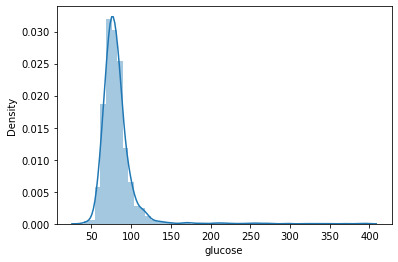

In [ ]:
sns.distplot(data['glucose'])

In [ ]:
#On further analysis found out that there are some more categorical variables
#education,diabetes,prevalentHyp,prevalentStroke,BPMeds
#sex,is_smoking --originally categorical variables

In [ ]:
data['sex'].value_counts()

F    1923
M    1467
Name: sex, dtype: int64

In [ ]:
data['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [ ]:
#columns with null values--education,cigperday,bpmeds,totchol,bmi,heartrate,glucose

In [ ]:
#categorical columns having null value--education,bpmeds-->replaced with mode(most frequent)
#for numerical values-->replaced with median

In [ ]:
cat=['education','BPMeds']


In [ ]:
simple_imputer=SimpleImputer(strategy='most_frequent')
simple_imputer.fit(data[cat])
data[cat]=simple_imputer.transform(data[cat])

In [ ]:
data.isnull().sum()

age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
#cigsPerDay,totChol,BMI,heartRate,glucose

In [ ]:
num=['cigsPerDay','totChol','BMI','heartRate','glucose']

In [ ]:
simple_imputer2=SimpleImputer(strategy='median')
simple_imputer2.fit(data[num])
data[num]=simple_imputer2.transform(data[num])

In [ ]:
data.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
#Now EDA on numerical and categorical variables.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [ ]:
#Categorical education,diabetes,prevalentHyp,prevalentStroke,BPMeds

In [ ]:
#Numerical--age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate

In [ ]:
#EDA on numerical variables

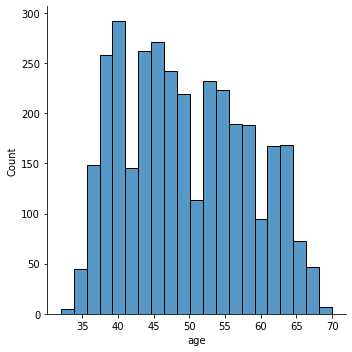

In [ ]:
sns.displot(data['age'])

In [ ]:
data['age'].max()

70

In [ ]:
data['age'].min()

32

In [ ]:
data['binned_age']=data['age'].apply(lambda x: x-x%5)

In [ ]:
data[['age','binned_age']].head(10)

,age,binned_age
0,64,60
1,36,35
2,46,45
3,50,50
4,64,60
5,61,60
6,61,60
7,36,35
8,41,40
9,55,55


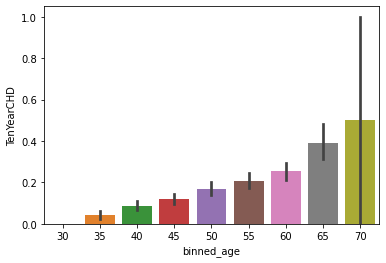

In [ ]:
sns.barplot(x='binned_age',y='TenYearCHD',data=data)

In [ ]:
#So after binning ages we see for higher age group people tenyearCHD increases.

In [ ]:
#box plot very well describes relation between numerical and categorical variable

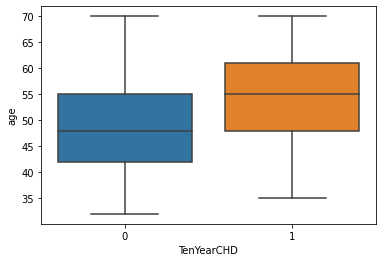

In [ ]:
sns.boxplot(y='age',x='TenYearCHD',data=data)# So higher age people has a higher no people with cardio vascular disease

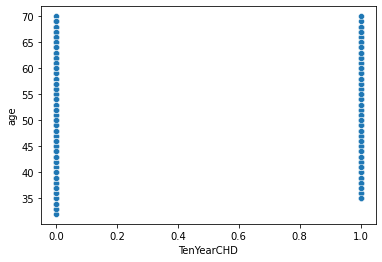

In [ ]:
sns.scatterplot(y=data['age'],x=data['TenYearCHD'])#Scatter plot will not work here as target variable is categorical

In [ ]:
alpha=0.01

In [ ]:
def cont_dependency(feature,alpha=alpha):
  F, p = f_oneway(data[data['TenYearCHD'] == 1][feature], data[data['TenYearCHD'] == 0][feature])
  print('significance=%.3f, p=%.5f' % (alpha, p))
  if p <= alpha:
    print('Ten year Risk of CHD is dependent on the continuous variable')
    return True
  else:
    print('Ten year Risk of CHD is not dependent on continuous variable')
    return False

In [ ]:
cont_dependency('age')

significance=0.010, p=0.00000
Ten year Risk of CHD is dependent on the continuous variable


True

In [ ]:
#need to understand anova test 

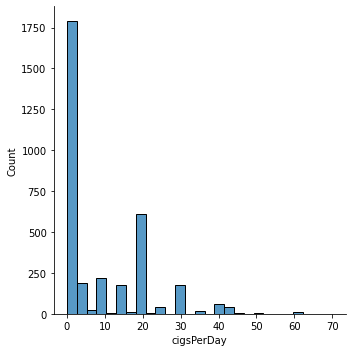

In [ ]:
sns.displot(data['cigsPerDay'])

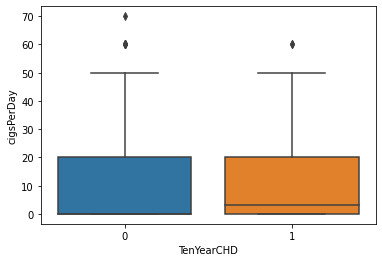

In [ ]:
sns.boxplot(x='TenYearCHD',y='cigsPerDay',data=data)

In [ ]:
#for cigper day also tenyearchd(1) has higher median 

In [ ]:
cont_dependency('cigsPerDay')

significance=0.010, p=0.00007
Ten year Risk of CHD is dependent on the continuous variable


True

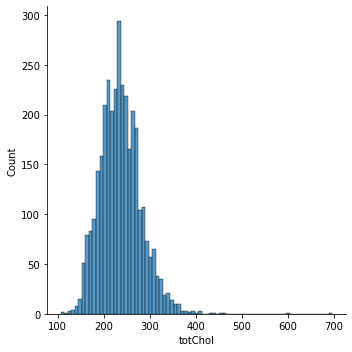

In [ ]:
sns.displot(data['totChol'])

In [ ]:
data['totChol'].max()

696.0

In [ ]:
data['totChol'].min()

107.0

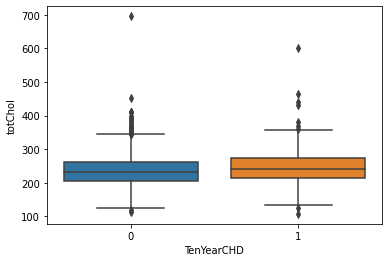

In [ ]:
sns.boxplot(x='TenYearCHD',y='totChol',data=data)

In [ ]:
#here for totchol there are a lot of outliers. Otherwise both classes have more or less same median

In [ ]:
#binning the totchol in bins of size 50

data['binned_totchol']=data['totChol'].apply(lambda x:x-x%50)

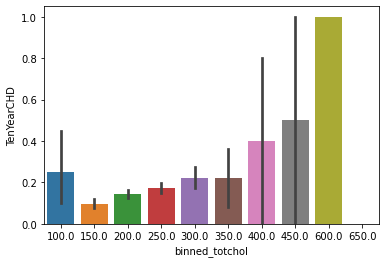

In [ ]:
sns.barplot(x='binned_totchol',y='TenYearCHD',data=data)

In [ ]:
cont_dependency('totChol')

significance=0.010, p=0.00000
Ten year Risk of CHD is dependent on the continuous variable


True

In [ ]:
#Lets remove the outliers-->outliers will be replaced with median values

In [ ]:
values=data.totChol.quantile([0.25,0.75])
print(values)
iqr=values.values[1]-values.values[0]
min_limit=values.values[0]-1.5*iqr
max_limit=values.values[1]+1.5*iqr
data['totChol']=data['totChol'].apply(lambda x: x if x>min_limit and x<max_limit else data['totChol'].median())


0.25    206.0
0.75    264.0
Name: totChol, dtype: float64


In [ ]:
#After removing outliers from the model

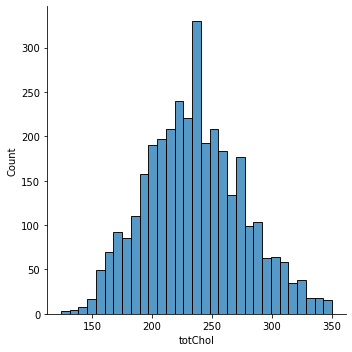

In [ ]:
sns.displot(data['totChol'])

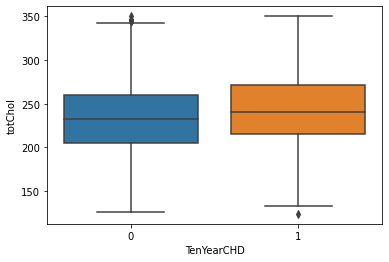

In [ ]:
sns.boxplot(x='TenYearCHD',y='totChol',data=data)

In [ ]:
data['binned_totchol']=data['totChol'].apply(lambda x:x-x%50)

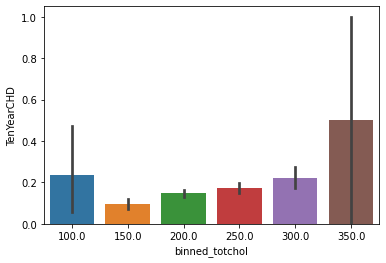

In [ ]:
sns.barplot(x='binned_totchol',y='TenYearCHD',data=data)

In [ ]:
#here also trend of higher tenCHD for higher totchol

In [ ]:
#sysBP,diaBP,BMI,heartRate

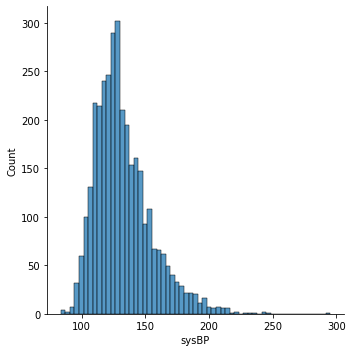

In [ ]:
sns.displot(data['sysBP'])

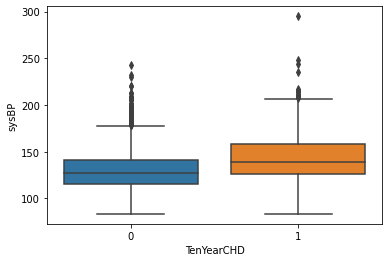

In [ ]:
sns.boxplot(x='TenYearCHD',y='sysBP',data=data)

In [ ]:
#here also lot of outliers are there

In [ ]:
sys_bp_values=data.sysBP.quantile([0.25,0.75])
iqr=sys_bp_values.values[1]-sys_bp_values.values[0]
min_limit=sys_bp_values.values[0]-iqr*1.5
max_limit=sys_bp_values.values[1]+iqr*1.5
data['sysBP']=data['sysBP'].apply(lambda x:x if x>min_limit and x<max_limit else data['sysBP'].median())

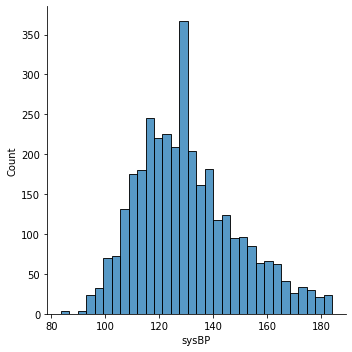

In [ ]:
sns.displot(data['sysBP'])

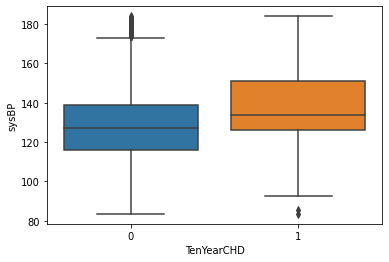

In [ ]:
sns.boxplot(x='TenYearCHD',y='sysBP',data=data)

In [ ]:
cont_dependency('sysBP')

significance=0.010, p=0.00000
Ten year Risk of CHD is dependent on the continuous variable


True

In [ ]:
#here also we can see some higher chance of CHD for higher sysBP

In [ ]:
data['binned_sysBP']=data['sysBP'].apply(lambda x:x-x%20)

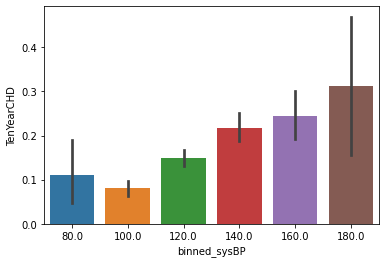

In [ ]:
sns.barplot(x='binned_sysBP',y='TenYearCHD',data=data)

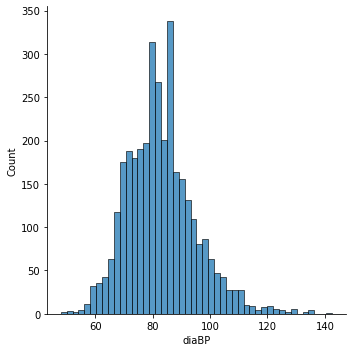

In [ ]:
sns.displot(data['diaBP'])

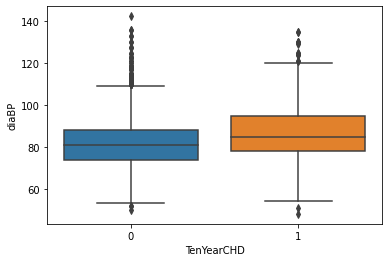

In [ ]:
sns.boxplot(x='TenYearCHD',y='diaBP',data=data)

In [ ]:
#again lot of outliers
#still higher diabp means higher TenYearCHD

In [ ]:
#Remove outliers

In [ ]:
dia_bp_values=data.diaBP.quantile([0.25,0.75])
iqr=dia_bp_values.values[1]-dia_bp_values.values[0]
min_limit=dia_bp_values.values[0]-iqr*1.5
max_limit=dia_bp_values.values[1]+iqr*1.5
data['diaBP']=data['diaBP'].apply(lambda x:x if x>min_limit and x<max_limit else data['diaBP'].median())

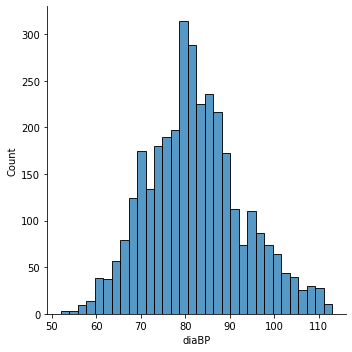

In [ ]:
sns.displot(data['diaBP'])

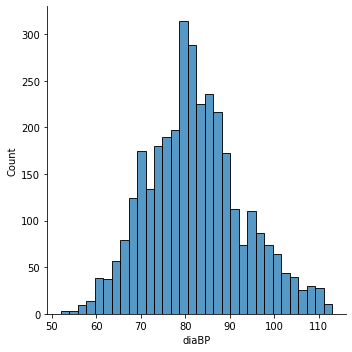

In [ ]:
sns.displot(data['diaBP'])

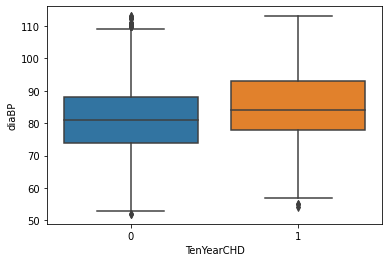

In [ ]:
sns.boxplot(x='TenYearCHD',y='diaBP',data=data)

In [ ]:
cont_dependency('diaBP')

significance=0.010, p=0.00000
Ten year Risk of CHD is dependent on the continuous variable


True

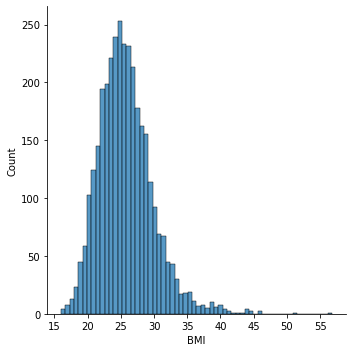

In [ ]:
sns.displot(data['BMI'])

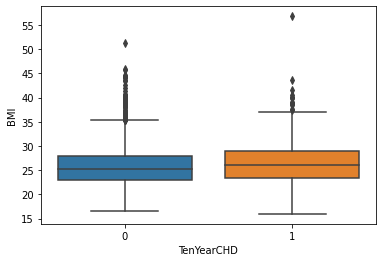

In [ ]:
sns.boxplot(x='TenYearCHD',y='BMI',data=data)

In [ ]:
#removing outliers

In [ ]:
BMI_values=data.BMI.quantile([0.25,0.75])
iqr=BMI_values.values[1]-BMI_values.values[0]
min_limit=BMI_values.values[0]-iqr*1.5
max_limit=BMI_values.values[1]+iqr*1.5
data['BMI']=data['BMI'].apply(lambda x:x if x>min_limit and x<max_limit else data['BMI'].median())

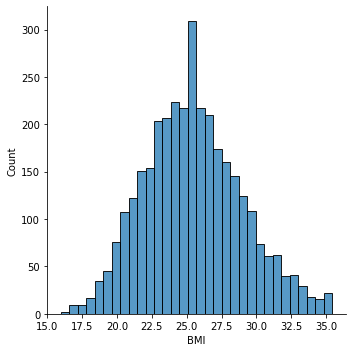

In [ ]:
sns.displot(data['BMI'])

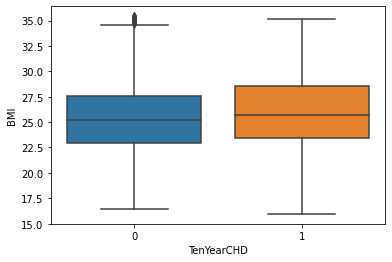

In [ ]:
sns.boxplot(x='TenYearCHD',y='BMI',data=data)

In [ ]:
#nearly similar trends

In [ ]:
data['binned_BMI']=data['BMI'].apply(lambda x:x-x%3)

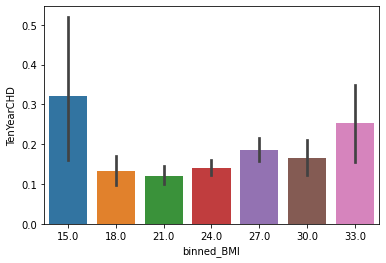

In [ ]:
sns.barplot(x='binned_BMI',y='TenYearCHD',data=data)

In [ ]:
#No clear cut trend can be observed

In [ ]:
cont_dependency('BMI')

significance=0.010, p=0.00072
Ten year Risk of CHD is dependent on the continuous variable


True

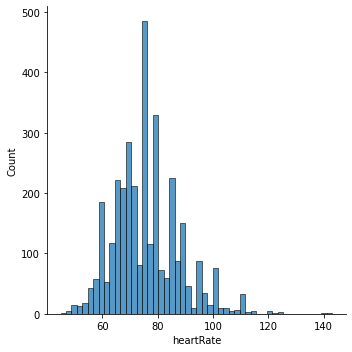

In [ ]:
sns.displot(data['heartRate'])

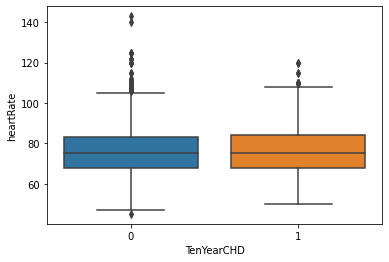

In [ ]:
sns.boxplot(x='TenYearCHD',y='heartRate',data=data)

In [ ]:
#removing outliers

In [ ]:
h=data.heartRate.quantile([0.25,0.75])
iqr=h.values[1]-h.values[0]
min_limit=h.values[0]-iqr*1.5
max_limit=h.values[1]+iqr*1.5
data['heartRate']=data['heartRate'].apply(lambda x:x if x>min_limit and x<max_limit else data['heartRate'].median())

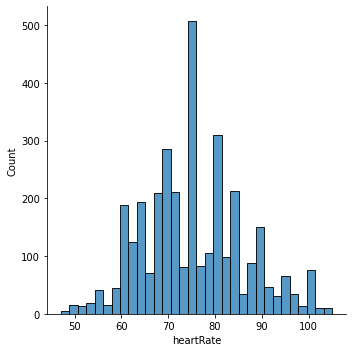

In [ ]:
sns.displot(data['heartRate'])

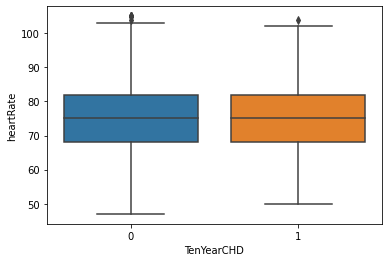

In [ ]:
sns.boxplot(x='TenYearCHD',y='heartRate',data=data)

In [ ]:
#no trend visible

In [ ]:
data['binned_heartRate']=data['heartRate'].apply(lambda x:x-x%10)

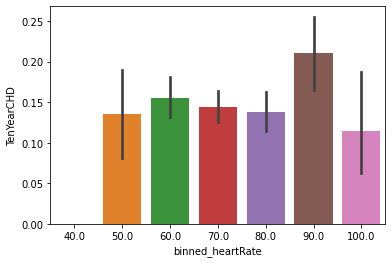

In [ ]:
sns.barplot(x='binned_heartRate',y='TenYearCHD',data=data)

In [ ]:
#no trend visible

In [ ]:
cont_dependency('heartRate')

significance=0.010, p=0.46350
Ten year Risk of CHD is not dependent on continuous variable


False

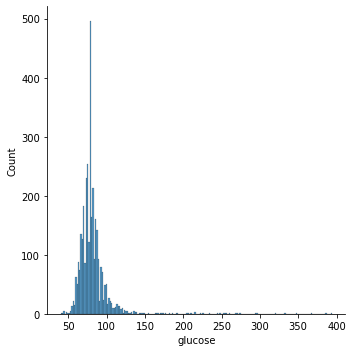

In [ ]:
sns.displot(data['glucose'])

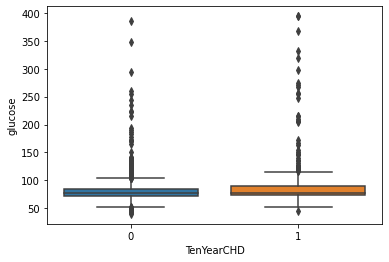

In [ ]:
sns.boxplot(x='TenYearCHD',y='glucose',data=data)

In [ ]:
#Removing outliers
h=data.glucose.quantile([0.25,0.75])
iqr=h.values[1]-h.values[0]
min_limit=h.values[0]-iqr*1.5
max_limit=h.values[1]+iqr*1.5
data['glucose']=data['glucose'].apply(lambda x:x if x>min_limit and x<max_limit else data['glucose'].median())

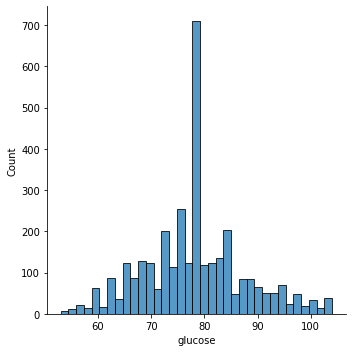

In [ ]:
sns.displot(data['glucose'])

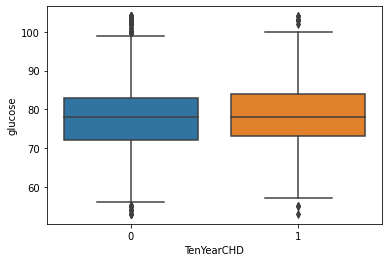

In [ ]:
sns.boxplot(x='TenYearCHD',y='glucose',data=data)

In [ ]:
#no great trend

In [ ]:
#Checking Co-relation between the independent continuous variables(Multicollinearity)

In [ ]:
num=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [ ]:
sns.pairplot(data[num])

In [ ]:
#sysBP and diaBP seems to be correlated

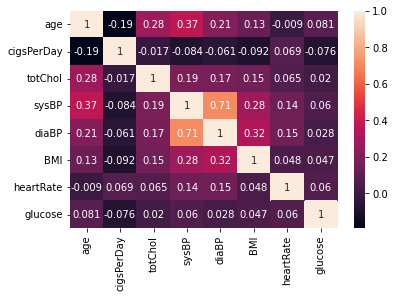

In [ ]:
sns.heatmap(data[num].corr(),annot=True)#correlation matrix

In [ ]:
#again from corrleation matrix we can say sysBP and diaBP are highly correlated

In [ ]:
#EDA for categorical variables

In [ ]:
#Categorical education,diabetes,prevalentHyp,prevalentStroke,BPMeds,,is_smoking,sex

In [ ]:
data['education'].value_counts()

1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


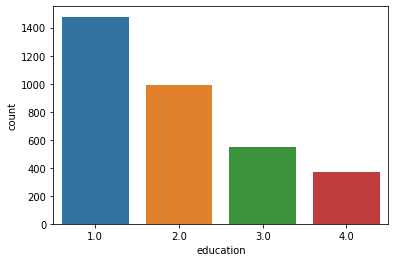

In [ ]:
sns.countplot(data['education'])

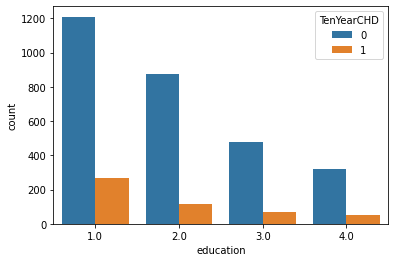

In [ ]:
sns.countplot(x='education',hue='TenYearCHD',data=data)

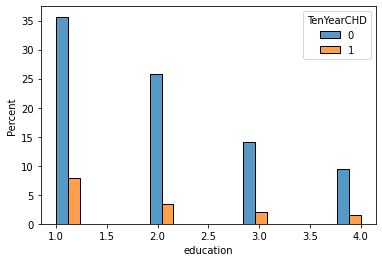

In [ ]:
sns.histplot(x='education',hue='TenYearCHD',stat='percent',multiple='dodge',data=data)

Text(0, 0.5, '%')

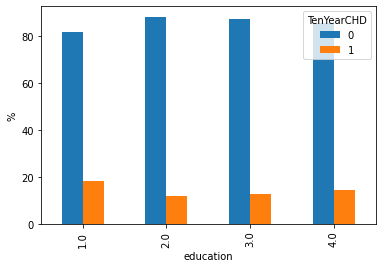

In [ ]:
freq_data=data_education=data.groupby('TenYearCHD')['education'].value_counts().unstack(0)
percent_df = freq_data.divide(freq_data.sum(axis=1), axis=0)*100
percent_df.plot(kind='bar')
plt.ylabel('%')

In [ ]:
prob = 0.99
alpha = 1.0 - prob

In [ ]:
# using chi-square statistic to determine any dependency between categorical variables
def cat_dependency(freq_df, alpha=alpha, verbose=True):
  stat, p, dof, expected = chi2_contingency(freq_df)
  if p <= alpha:
    if verbose:
      print('significance=%.3f, p=%.7f' % (alpha, p))
      print('Categorical variables are dependent')
    return True
  else:
    if verbose:
      print('significance=%.3f, p=%.7f' % (alpha, p))
      print('Categorical variables are not dependent')
    return False

In [ ]:
data.groupby('education')['education'].count()

education
1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


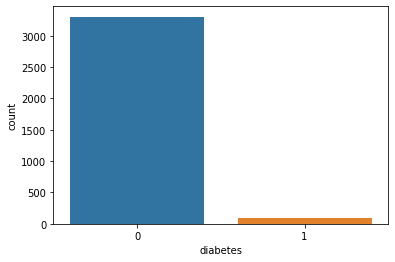

In [ ]:
sns.countplot(data['diabetes'])

In [ ]:
freq_data=data_education=data.groupby('TenYearCHD')['diabetes'].value_counts().unstack(0)
percent_df = freq_data.divide(freq_data.sum(axis=1), axis=0)*100
percent_df.plot(kind='bar')
plt.ylabel('%')

In [ ]:
#those who have diabetes have relatively higher chance of chd

In [ ]:
cat_dependency(freq_data)

In [ ]:
#prevalentHyp,prevalentStroke,BPMeds,,is_smoking,sex

In [ ]:
sns.countplot(data['prevalentHyp'])

In [ ]:
freq_data=data_education=data.groupby('TenYearCHD')['prevalentHyp'].value_counts().unstack(0)
percent_df = freq_data.divide(freq_data.sum(axis=1), axis=0)*100
percent_df.plot(kind='bar')
plt.ylabel('%')

In [ ]:
cat_dependency(freq_data)

In [ ]:
sns.countplot(data['prevalentStroke'])

In [ ]:
data['prevalentStroke'].value_counts()

In [ ]:
#very less 1 values

In [ ]:
freq_data=data_education=data.groupby('TenYearCHD')['prevalentStroke'].value_counts().unstack(0)
percent_df = freq_data.divide(freq_data.sum(axis=1), axis=0)*100
percent_df.plot(kind='bar')
plt.ylabel('%')

In [ ]:
#clearly prevalentStroke 1 has higher% of peopele having TenCHD

In [ ]:
sns.countplot(data['BPMeds'])

In [ ]:
freq_data=data_education=data.groupby('TenYearCHD')['BPMeds'].value_counts().unstack(0)
percent_df = freq_data.divide(freq_data.sum(axis=1), axis=0)*100
percent_df.plot(kind='bar')
plt.ylabel('%')

In [ ]:
#clearly BPmeds 1 has higher% of peopele having TenCHD

In [ ]:
cat_dependency(freq_data)

In [ ]:
sns.countplot(data['is_smoking'])

In [ ]:
freq_data=data_education=data.groupby('TenYearCHD')['is_smoking'].value_counts().unstack(0)
percent_df = freq_data.divide(freq_data.sum(axis=1), axis=0)*100
percent_df.plot(kind='bar')
plt.ylabel('%')

In [ ]:
#No trend is visible

In [ ]:
cat_dependency(freq_data)

In [ ]:
sns.countplot(data['sex'])

In [ ]:
freq_data=data_education=data.groupby('TenYearCHD')['sex'].value_counts().unstack(0)
percent_df = freq_data.divide(freq_data.sum(axis=1), axis=0)*100
percent_df.plot(kind='bar')
plt.ylabel('%')

In [ ]:
#very slight trend may be there

In [ ]:
cat_dependency(freq_data)

In [ ]:
cat1=['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

In [ ]:
data[cat1]

In [ ]:
sns.heatmap(data[cat1].corr(),annot=True)

In [ ]:
#Encoding for sex and is_smoking
#male-1 female-0
#true-1 false-0 isSmoking
data1=data.copy()

In [ ]:
data1['sex']=data1['sex'].apply(lambda x: 1 if x=='M' else 0)

In [ ]:
data1['is_smoking']=data1['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

In [ ]:
sns.heatmap(data1[cat1].corr(),annot=True)

In [ ]:
#NO such high degree of correlation

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(data1.corr(),annot=True)

In [ ]:
#We can high correlation b/w:
#is_smoking and cigs_per day
#sysBP and prevalentHP

In [ ]:
#Doing further VIF test

def cal_vif(X):
    vif=pd.DataFrame()
    vif["column"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [ ]:
#Vif is less than 10

In [ ]:
data1.columns#-cat1

In [ ]:
num=[ i for i in data1.columns if i not in cat1]

In [ ]:
num

In [ ]:
num1=[i for i in num if i not in {'TenYearCHD','diaBP'}]

In [ ]:
cal_vif(data1[num])

In [ ]:
#removing diaBP and calculating VIF
num1=[i for i in num if i not in {'TenYearCHD','diaBP'}]

In [ ]:
cal_vif(data1[num1])

In [ ]:
num1=[i for i in num if i not in {'TenYearCHD','diaBP'}]

In [ ]:
cal_vif(data1[num1])

In [ ]:
#Cigs_per_day can be kept and is_smoking removed
#prevalentHP can be removed and sysBP is kept

In [ ]:
#Feature Engineering

In [ ]:
data=data.drop('diaBP',axis=1)

In [ ]:
data=data.drop('is_smoking',axis=1)

In [ ]:
data=data.drop('prevalentHyp',axis=1)

In [ ]:
data.info()

In [ ]:
#now encode sex variable --One Hot Encoder

In [ ]:
dummy_gender=pd.get_dummies(data['sex'],prefix='Sex_')

In [ ]:
data=pd.merge(left=data,right=dummy_gender,left_index=True,right_index=True)

In [ ]:
data.head()

In [ ]:
data=data.drop('sex',axis=1)

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
#Oversampling to remove class imbalance

In [ ]:
data['TenYearCHD'].value_counts()

In [ ]:
smote=SMOTE()

In [ ]:
Y=data['TenYearCHD']
X=data.drop('TenYearCHD',axis=1)

In [ ]:
Y.value_counts()

In [ ]:
X,Y=smote.fit_resample(X,Y)

In [ ]:
Y.value_counts()#class imbalance removed

In [ ]:
data.info()

In [ ]:
X.info()

In [ ]:
#Train Test split of data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [ ]:
#Standardizing Data with MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
#Applying models

In [ ]:
#Logistic Regression

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)


In [ ]:
Y_train_pred=lr.predict(X_train)

In [ ]:
Y_train_pred[0:39]

In [ ]:
accuracy_score(Y_train_pred,Y_train)

In [ ]:
Y_train_pred_prob=lr.predict_proba(X_train)

In [ ]:
Y_train_pred_prob

In [ ]:
Y_test_pred_prob=lr.predict_proba(X_test)

In [ ]:
Y_test_pred_prob=Y_test_pred_prob[:,1]

In [ ]:
Y_train_pred_prob.shape

In [ ]:
Y_train_pred_prob=Y_train_pred_prob[:,1]

In [ ]:
Y_train_pred_prob

In [ ]:
Y_test_pred=lr.predict(X_test)

In [ ]:
accuracy_score(Y_test_pred,Y_test)

In [305]:
print("Train precision=",precision_score(Y_train_pred,Y_train))
print("Test precision= ",precision_score(Y_test_pred,Y_test))
print("Train recall=   ",recall_score(Y_train_pred,Y_train))
print("Test recall    =",recall_score(Y_test_pred,Y_test))
print("Train roc_auc score=",roc_auc_score(Y_train_pred,Y_train))
print("Test roc_auc score =",roc_auc_score(Y_test_pred,Y_test))

cm_train=confusion_matrix(Y_train, Y_train_pred,labels=lr.classes_)
cm_test=confusion_matrix(Y_test, Y_test_pred,labels=lr.classes_)

p1=ConfusionMatrixDisplay(confusion_matrix=cm_train)
p1.plot()

p2=ConfusionMatrixDisplay(confusion_matrix=cm_test)
p2.plot()



plt.show()

Train precision= 0.6672391584370975
Test precision=  0.6909090909090909
Train recall=    0.7735191637630662
Test recall    = 0.7265774378585086
Train roc_auc score= 0.7375489542342477
Test roc_auc score = 0.7281535837941191


AttributeError: ignored

In [ ]:
fpr,tpr,_=roc_curve(Y_train,Y_train_pred_prob)
plt.plot(fpr,tpr, marker='.', label='logistic regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

fpr,tpr,_=roc_curve(Y_test,Y_test_pred_prob)
plt.plot(fpr,tpr, marker='.', label='logistic regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
#Logistic Regression with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Basically, a high C means "Trust this training data a lot", 
#while a low value says "This data may not be fully representative of the real world data, 
#so if it's telling you to make a parameter really large, don't listen to it".

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
lr=LogisticRegression()
lr_cv=GridSearchCV(lr,param_grid=grid,cv = 5, scoring = 'recall')
lr_cv.fit(X_train,Y_train)

print("tuned hpyerparameters :(best parameters) ",lr_cv.best_params_)
print("accuracy :",lr_cv.best_score_)

In [ ]:
Y_pred_train=lr_cv.predict(X_train)
Y_pred_test=lr_cv.predict(X_test)

In [ ]:
Y_pred_train_prob=lr_cv.predict_proba(X_train)
Y_pred_test_prob=lr_cv.predict_proba(X_test)

In [ ]:
roc_auc_score(Y_train_pred,Y_train)

In [ ]:
roc_auc_score(Y_test_pred,Y_test)

Train precision= 0.6672391584370975
Test precision=  0.6909090909090909
Train recall=    0.7735191637630662
Test recall    = 0.7265774378585086
Train roc_auc score= 0.7375489542342477
Test roc_auc score = 0.7281535837941191


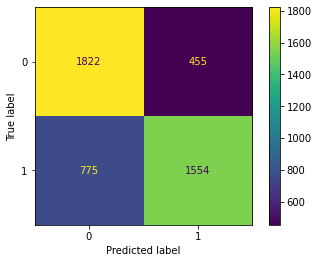

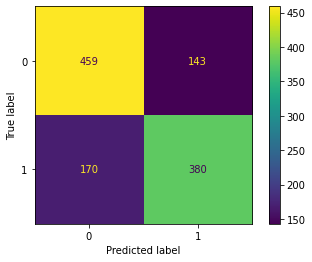

Text(0, 0.5, 'True Positive Rate')

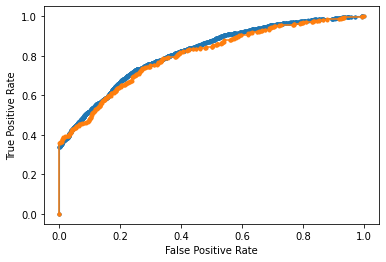

In [306]:
print("Train precision=",precision_score(Y_train_pred,Y_train))
print("Test precision= ",precision_score(Y_test_pred,Y_test))
print("Train recall=   ",recall_score(Y_train_pred,Y_train))
print("Test recall    =",recall_score(Y_test_pred,Y_test))
print("Train roc_auc score=",roc_auc_score(Y_train_pred,Y_train))
print("Test roc_auc score =",roc_auc_score(Y_test_pred,Y_test))

cm_train=confusion_matrix(Y_train, Y_train_pred,labels=lr_cv.classes_)
cm_test=confusion_matrix(Y_test, Y_test_pred,labels=lr_cv.classes_)

p1=ConfusionMatrixDisplay(confusion_matrix=cm_train)
p1.plot()

p2=ConfusionMatrixDisplay(confusion_matrix=cm_test)
p2.plot()



plt.show()


fpr,tpr,_=roc_curve(Y_train,Y_train_pred_prob)
plt.plot(fpr,tpr, marker='.', label='logistic regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

fpr,tpr,_=roc_curve(Y_test,Y_test_pred_prob)
plt.plot(fpr,tpr, marker='.', label='logistic regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
#Applying Decision Tree on the data

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

In [312]:
dt=DecisionTreeClassifier()
param_grid={'min_samples_split':[2,4,8,16],
            'min_samples_leaf':[3,4,5]}
dt=GridSearchCV(dt,param_grid=param_grid,scoring='roc_auc',cv=5)

In [313]:
dt.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [2, 4, 8, 16]},
             scoring='roc_auc')

In [314]:
y_predict_train=dt.predict(X_train)
y_predict_train_prob=dt.predict_proba(X_train)
y_predict_train_prob=y_predict_train_prob[:,1]

y_predict_test=dt.predict(X_test)
y_predict_test_prob=dt.predict_proba(X_test)
y_predict_test_prob=y_predict_test_prob[:,1]


Train accuracy 0.9218410768562745
Test  accuracy 0.8394097222222222
precision: 0.8978102189781022
precision: 0.8309090909090909
recall: 0.9448712155445097
recall: 0.8324225865209471


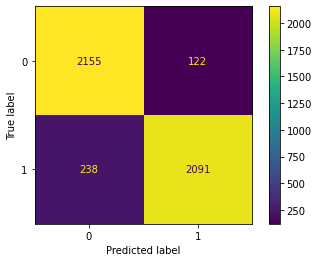

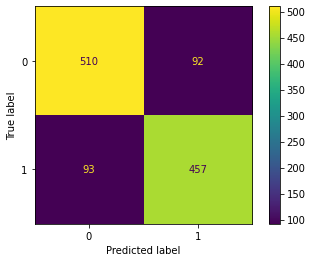

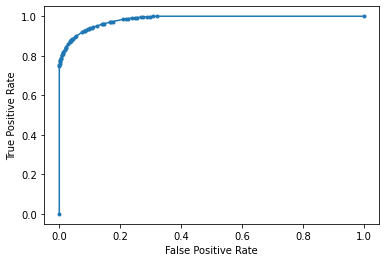

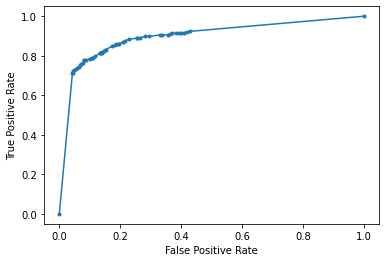

In [315]:
roc_auc_score(y_predict_test,Y_test)

print("Train accuracy",accuracy_score(y_predict_train,Y_train))
print("Test  accuracy",accuracy_score(y_predict_test,Y_test))

print("precision:",precision_score(y_predict_train,Y_train))
print("precision:",precision_score(y_predict_test,Y_test))

print("recall:",recall_score(y_predict_train,Y_train))
print("recall:",recall_score(y_predict_test,Y_test))


cm_train=confusion_matrix(Y_train, y_predict_train,labels=dt.classes_)
cm_test=confusion_matrix(Y_test, y_predict_test,labels=dt.classes_)


p1=ConfusionMatrixDisplay(confusion_matrix=cm_train)
p1.plot()

p2=ConfusionMatrixDisplay(confusion_matrix=cm_test)
p2.plot()

plt.show()


fpr,tpr,_=roc_curve(Y_train,y_predict_train_prob)
plt.plot(fpr,tpr, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

fpr,tpr,_=roc_curve(Y_test,y_predict_test_prob)
plt.plot(fpr,tpr, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.show()





In [ ]:
from sklearn.ensemble import RandomForestClassifier#for random forest(bagging)
from sklearn.ensemble import GradientBoostingClassifier#for gradient boosting(boosting) 
from sklearn.model_selection import GridSearchCV

In [ ]:
#Random forest model

In [317]:
rf=RandomForestClassifier()
param_grid={'n_estimators':[50,80,100,120],
            'min_samples_split':[2,4,8,16],
            'max_samples':[0.2,0.4,0.6,0.8],
            'min_samples_leaf':[3,4,5]}
rf=GridSearchCV(rf,param_grid=param_grid,scoring='roc_auc',cv=5)

In [318]:
rf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_samples': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [2, 4, 8, 16],
                         'n_estimators': [50, 80, 100, 120]},
             scoring='roc_auc')

In [319]:
Y_predict_train=rf.predict(X_train)
Y_predict_test=rf.predict(X_test)

Y_predict_train_prob=rf.predict_proba(X_train)
Y_predict_train_prob=Y_predict_train_prob[:,1]
Y_predict_test_prob=rf.predict_proba(X_test)
Y_predict_test_prob=Y_predict_test_prob[:,1]

roc_train: 0.9773670666882053
roc_test: 0.9138235975751071
train accuracy 0.976769431176726
test  accuracy 0.9114583333333334
precision: 0.9566337483898669
precision: 0.8745454545454545
recall: 0.9973142345568488
recall: 0.9357976653696498


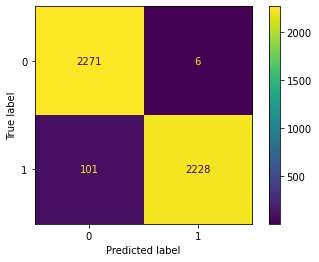

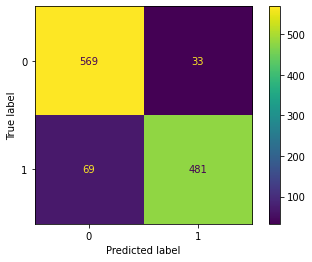

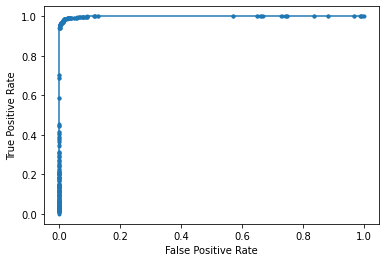

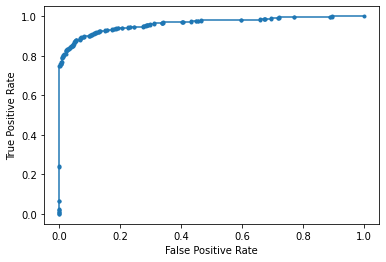

In [320]:
print("roc_train:",roc_auc_score(Y_predict_train,Y_train))
print("roc_test:",roc_auc_score(Y_predict_test,Y_test))


print("train accuracy",accuracy_score(Y_predict_train,Y_train))
print("test  accuracy",accuracy_score(Y_predict_test,Y_test))

print("precision:",precision_score(Y_predict_train,Y_train))
print("precision:",precision_score(Y_predict_test,Y_test))

print("recall:",recall_score(Y_predict_train,Y_train))
print("recall:",recall_score(Y_predict_test,Y_test))


cm_train=confusion_matrix(Y_train, Y_predict_train)#,labels=rf.classes_)
cm_test=confusion_matrix(Y_test, Y_predict_test)#,labels=rf.classes_)


p1=ConfusionMatrixDisplay(confusion_matrix=cm_train)
p1.plot()

p2=ConfusionMatrixDisplay(confusion_matrix=cm_test)
p2.plot()

plt.show()



fpr,tpr,_=roc_curve(Y_train,Y_predict_train_prob)
plt.plot(fpr,tpr, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

fpr,tpr,_=roc_curve(Y_test,Y_predict_test_prob)
plt.plot(fpr,tpr, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.show()

In [ ]:
#best model as of now

In [ ]:
#Gradient Boosting

In [326]:
gb=GradientBoostingClassifier()
param_grid={'min_samples_split':[2,5,8,10],'max_depth':[5,10,20,30],'min_samples_leaf':[3,4,5]}
gb=GridSearchCV(gb,param_grid=param_grid,scoring='roc_auc',cv=5)

In [327]:
gb.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [2, 5, 8, 10]},
             scoring='roc_auc')

In [333]:
Y_predict_train=gb.predict(X_train)
Y_predict_test=gb.predict(X_test)

Y_predict_train_prob=gb.predict_proba(X_train)
Y_predict_train_prob=Y_predict_train_prob[:,1]
Y_predict_test_prob=gb.predict_proba(X_test)
Y_predict_test_prob=Y_predict_test_prob[:,1]

roc_train: 1.0
roc_test: 0.9188403450182867
train accuracy 1.0
test accuracy 0.9157986111111112
precision: 1.0
precision: 0.8745454545454545
recall: 1.0
recall: 0.9449901768172888


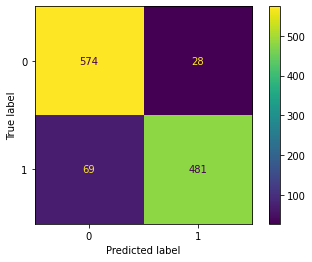

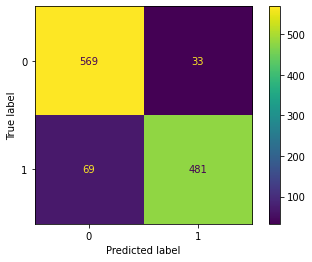

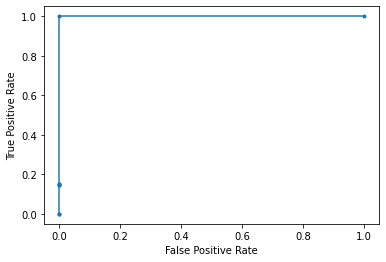

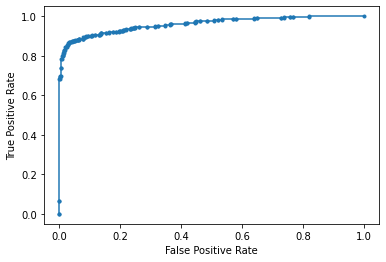

In [334]:
print("roc_train:",roc_auc_score(Y_predict_train,Y_train))
print("roc_test:",roc_auc_score(Y_predict_test,Y_test))


print("train accuracy",accuracy_score(Y_predict_train,Y_train))
print("test accuracy",accuracy_score(Y_predict_test,Y_test))

print("precision:",precision_score(Y_predict_train,Y_train))
print("precision:",precision_score(Y_predict_test,Y_test))

print("recall:",recall_score(Y_predict_train,Y_train))
print("recall:",recall_score(Y_predict_test,Y_test))


cm_train=confusion_matrix(Y_train, Y_predict_train,labels=gb.classes_)
cm_train=confusion_matrix(Y_test, Y_predict_test,labels=gb.classes_)


p1=ConfusionMatrixDisplay(confusion_matrix=cm_train)
p1.plot()

p2=ConfusionMatrixDisplay(confusion_matrix=cm_test)
p2.plot()

plt.show()



fpr,tpr,_=roc_curve(Y_train,Y_predict_train_prob)
plt.plot(fpr,tpr, marker='.', label='Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


fpr,tpr,_=roc_curve(Y_test,Y_predict_test_prob)
plt.plot(fpr,tpr, marker='.', label='Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.show()




In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg=XGBClassifier()
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}
xg=GridSearchCV(xg,param_grid=param_grid,scoring='roc_auc',cv=5)

In [ ]:
xg.fit(X_train,Y_train)

In [331]:
Y_predict_train=xg.predict(X_train)
Y_predict_test=xg.predict(X_test)
Y_predict_train_prob=xg.predict_proba(X_train)
Y_predict_train_prob=Y_predict_train_prob[:,1]
Y_predict_test_prob=xg.predict_proba(X_test)
Y_predict_test_prob=Y_predict_test_prob[:,1]

roc_train: 0.9534681139420715
roc_test: 0.9174438553918918
accuracy 0.9496309161962657
accuracy 0.9105902777777778
precision: 0.9021039072563332
precision: 0.8472727272727273
recall: 0.9980997624703087
recall: 0.9608247422680413


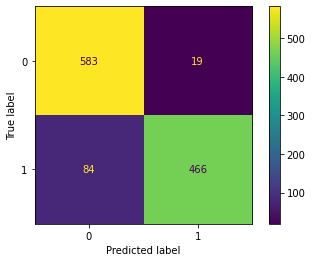

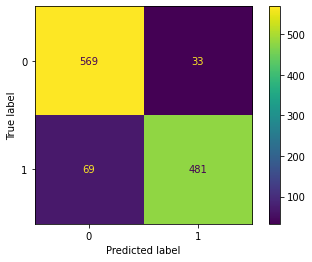

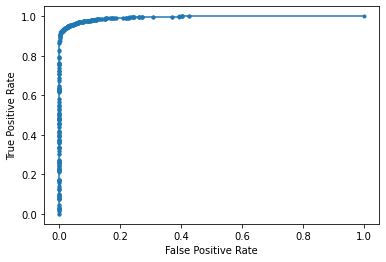

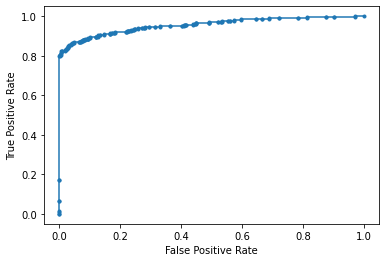

In [332]:
print("roc_train:",roc_auc_score(Y_predict_train,Y_train))
print("roc_test:",roc_auc_score(Y_predict_test,Y_test))


print("accuracy",accuracy_score(Y_predict_train,Y_train))
print("accuracy",accuracy_score(Y_predict_test,Y_test))

print("precision:",precision_score(Y_predict_train,Y_train))
print("precision:",precision_score(Y_predict_test,Y_test))

print("recall:",recall_score(Y_predict_train,Y_train))
print("recall:",recall_score(Y_predict_test,Y_test))


cm_train=confusion_matrix(Y_train, Y_predict_train,labels=xg.classes_)
cm_train=confusion_matrix(Y_test, Y_predict_test,labels=xg.classes_)


p1=ConfusionMatrixDisplay(confusion_matrix=cm_train)
p1.plot()

p2=ConfusionMatrixDisplay(confusion_matrix=cm_test)
p2.plot()

plt.show()



fpr,tpr,_=roc_curve(Y_train,Y_predict_train_prob)
plt.plot(fpr,tpr, marker='.', label='XG Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


fpr,tpr,_=roc_curve(Y_test,Y_predict_test_prob)
plt.plot(fpr,tpr, marker='.', label='XG Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.show()


In [ ]:
#in conclusion best performing model is Random Forest but there is overfitting happening